# Intro to Linear Regression and Prediction 

How do you predict the future? 
--
As a Data Scientist, one of our responsbilities is to make reaonable predictions of the future from information of the past. In the wild ocean of data, it will save a lot of effort for us if this process can be replaced by machines. Machine learning is a way of teaching machines to identity patterns and make predictions of the future, and even make more rational decisions than human. 

Let's take a look of a simple example of training a computer to make prediction.

In [229]:
import pandas as pd
import numpy as np
import quandl
import math
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression
import mpl_toolkits
import seaborn as sns


1.Housing Value and Visualization
--

As unpredictable as the housing price can be, it is an important index of the economic situation of a region and have a huge influence on people's daily life. Wouldn't it be nice if we can predict how much our house values tomorrow?

Let's take a look at the Single-Family Residence in a nice and quiet town in Oakfield, NY. 

The chart below shows the home value index from 11/30/2010 to 9/29/2018 (only top 10 are shown).

In [267]:
df = quandl.get("ZILLOW/C25709_ZRISFRR", authtoken="A_6yfxtbtVERKJ4qXr-7")
df.head(20)

,Value
Date,
2010-11-30,1267.0
2010-12-31,1268.0
2011-01-31,1280.0
2011-02-28,1291.0
2011-03-31,1276.0
2011-04-30,1286.0
2011-05-31,1284.0
2011-06-30,1291.0
2011-07-31,1295.0


Let's visualize it using the visualization tool. You can tell that it is pretty instable.

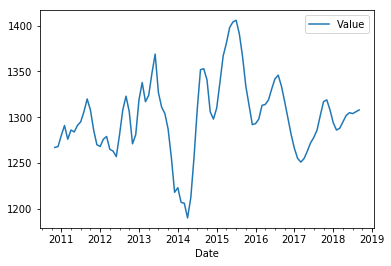

In [231]:
df.plot.line()

It might also be useful to look at the percentage of the change in values every year. 

Changing% from 2017 to 2018 = 
(Value of 2018 - Value of 2017) /  (Value of 2017)
--
Below are the visualizatons.



In [232]:
df['PCT_change'] = df.pct_change()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x124907a90>,
      dtype=object)

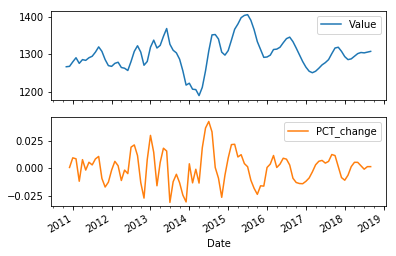

In [233]:
df.head(10)
df.plot.line(subplots=True)

2.Prediction
--

Since our data are collected every month, we are predicting the value of "next month". We can create another column in the chart aloneside the old one, representing its "next month" value. For example in the chart below:

On 11/30/2010, the current value ("Value") is 1267.0. The value of next month ("Label") is 1268.0, which corresponds with the value of 12/31/2010 in the next row.

In [235]:
predict_c = 'Value'
##making an outlier 
df.fillna(-99999, inplace = True)
#making a new column"label" for price prediction for next month
predict_result = int(math.ceil(0.01 * len(df)))
df['Label'] = df[predict_c].shift(-predict_result)
df.dropna(inplace = True)
df.head(10)

,Value,PCT_change,Label
Date,,,
2010-11-30,1267.0,-99999.000000,1268.0
2010-12-31,1268.0,0.000789,1280.0
2011-01-31,1280.0,0.009464,1291.0
2011-02-28,1291.0,0.008594,1276.0
2011-03-31,1276.0,-0.011619,1286.0
2011-04-30,1286.0,0.007837,1284.0
2011-05-31,1284.0,-0.001555,1291.0
2011-06-30,1291.0,0.005452,1295.0
2011-07-31,1295.0,0.003098,1306.0


Usually, we use X to represent the our "Value" --- what we are making predictions based on, 

and
y to represent the "Label"-- what we are comparing our data to.

We then scale X to prepare for the linear regression model.

In [180]:
#Usually, X represents the our current value that we are making predictions based on. 
## y represents the label what we are comparing our data to.

X = np.array(df.drop(['Label'], 1))
y = np.array(df['Label'])

#scaling X 
X = preprocessing.scale(X)
y = np.array(df['Label'])

2.1 Training Data and Testing Data
--

Before calculating the relation between this month and the next month. Let's first split our data into 

1.Training data(80% of the data)

2.Testing data (20% of the data)

Training data is what we use to identify patterns and experimenting on the prediction. Testing data is what we use to test out our prediction and see if its accurate or not. 

In [181]:
#creating train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [252]:
X_test

array([[-0.89185333,  0.10369497],
       [ 1.26758548,  0.1036952 ],
       [ 0.18786607,  0.10369424],
       [ 0.09189101,  0.10369505],
       [ 0.45179748,  0.1036955 ],
       [ 0.45179748,  0.10369528],
       [-1.17977851,  0.10369482],
       [ 0.90767901,  0.10369653],
       [-0.48395934,  0.10369605],
       [ 0.6437476 ,  0.10369214],
       [ 0.13987854,  0.10369596],
       [-0.29200922,  0.10369528],
       [-0.72389698,  0.10369392],
       [ 0.30783489,  0.10369625],
       [ 0.09189101,  0.10369461],
       [ 2.34730488,  0.10369633],
       [ 1.00365407,  0.10369593],
       [ 0.40380995,  0.1036936 ],
       [ 1.60349818,  0.10369724]])

In [141]:
y_test

array([1268., 1280., 1291., 1276., 1286., 1284., 1291., 1295., 1306.,
       1320., 1308., 1286., 1270., 1268., 1276., 1279., 1265., 1263.,
       1257., 1281., 1308., 1323., 1306., 1271., 1281., 1319., 1338.,
       1317., 1324., 1348., 1369., 1327., 1311., 1304., 1287., 1256.,
       1218., 1223., 1207., 1206., 1190., 1212., 1256., 1309., 1352.,
       1353., 1341., 1306., 1298., 1310., 1338., 1367., 1381., 1398.,
       1404., 1406., 1391., 1366., 1334., 1313., 1292., 1293., 1298.,
       1313., 1314., 1319., 1331., 1342., 1346., 1334., 1317., 1299.,
       1281., 1266., 1255., 1251., 1255., 1263., 1272., 1278., 1286.,
       1302., 1317., 1319., 1308., 1294., 1286., 1288., 1295., 1302.,
       1305., 1304., 1306.])

3.Linear Regression
--



Linear Rregession is one of the tools we can use to fine a pattern in our data. 
Let's start with an easier example.

Before the test, if you study for 0 hour, you will get a 50. If you study for 1 hour, you are likely to get a 65... If you study for 10 hours, you get an 100. The x-axis, labled "Study Time", is an independent variable you can choose. The y-axis("Grades"), however, only changes if the Study Time changes so it is a dependent variable. As you can see, there is a pattern between your Study Time and your Grades. Generally, if you study more, your grade is higher, 
and the opposite happens very rarely. This relation can be put into a formula.

y = mx + b
--

**additional notes:**

(estimate of y − average of y) / SD of y = r * (the given x − average of x) / SD of x

m = r * (SD of y) / (SD of x)

b = average of y − m ⋅ average of x


Y is your grade, and X is the study time. m is the slope of the line, representing how much Y changes when X changes, and b is zero point of Y. 



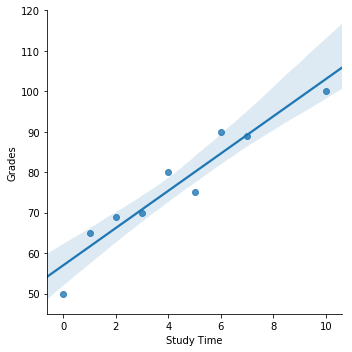

In [202]:
study_grade = pd.DataFrame({ 'Study Time' : [0,1,2,3,4,5,6,7,10], 'Grades':[50,65,69,70,80,75,90,89,100]})
sns.lmplot(x='Study Time',y='Grades',data=study_grade,fit_reg=True)

In our prediction, this line is called Regression Line. All the dots are our data of "Next month", and the regression line is our best redictions of "Next month". The regression is the "best-fitting line" among these dots. This means that the total distances from the dots to the line is the smallest, and in the real world, the difference between the real data and our predictions are the smallest. Therefore, we can make predictions by simply plugging in X to get Y. 

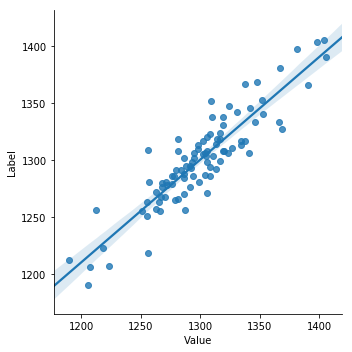

In [196]:
sns.lmplot(x='Value',y='Label',data=df,fit_reg=True)

Remember our Testing Data?

After we make our predictions, let's compare them to the real value of the tesing set to see the accuracy. 

It's pretty identical!

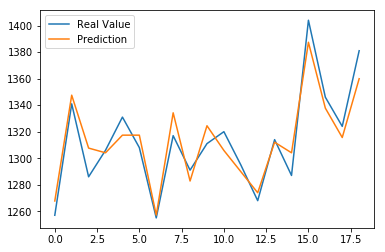

In [264]:
c = LinearRegression(n_jobs = -1)
c.fit (X_train, y_train)
y_pred = c.predict(X_test)
y_pred
y_test
comparison_df = pd.DataFrame({ 'Real Value' : y_test, 'Prediction':y_pred})
ax = comparison_df.plot.line()

Our prediction for the next month of 9/29/2018.

In [263]:
Next_month = c.predict(X_test)
Next_month[Next_month.size-1]

1324.5134697928788

We can then repeat the test for thosands of times(computer can do it for us!). The score represents the accuracy percentage of our prediction. 

In [166]:
#find the classifier
confidence = c.score(X_test, y_test)
confidence


0.9205386091054993

We can also try other algorithms easily, such as polynomials, even though the result is not as good as the linear regression.

In [209]:
#try different algotithm polynomial, which is VERY bad 
c = svm.SVR(kernel = 'poly')
c.fit (X_train, y_train)
confidence = c.score(X_test, y_test)
confidence

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5117449221167326

4.Other Machine Learning Tools 
--
Except for Linear Regression, there are many more fields of Machine Learning that is worth exploring. For example,

1.Classification with K nearest neighbor

2.Optimization with Support Vector Machine (SVM)

3.Clustering

4.Deep Learning with Neural Network and TensorFlow

...

If you are interested in learning more, come join us in HasBrain's community and become a future data scientist yourself!

http://www.hasbrain.com/